## Question 1

### Graphical Summary of Escape Times

In [1]:
import pandas as pd
df1 = pd.read_csv('..\homework_files\escape.csv')
df1.head(5)

,Time
0,389
1,356
2,359
3,363
4,375


<AxesSubplot: ylabel='Count'>

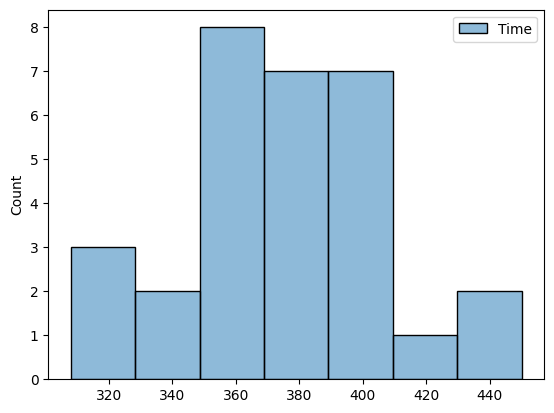

In [2]:
import seaborn as sns
sns.histplot(data=df1)

Distribution is unimodel with a slight skew to the left.

### Numerical Summary of Escape Times

In [41]:
IQR = df1.describe().loc['75%'][0] - df1.describe().loc['25%'][0]
print('Median: {}\nVar: {}\nIQR: {},\nOthers:'.format(
    df1.median()['Time'], df1.var()['Time'], IQR))
df1.describe()


Median: 371.5
Var: 1051.9091954022988
IQR: 34.0,
Others:


,Time
count,30.000000
mean,374.433333
std,32.433150
min,308.000000
25%,359.000000
50%,371.500000
75%,393.000000
max,450.000000


### Outliers

In [43]:
df1['Outlier'] = df1.Time.apply(lambda x : (x < df1.describe().loc['25%'][0] - 1.5 * IQR ) ^ (x > df1.describe().loc['75%'][0] + 1.5 * IQR))
df1['Extreme_Outlier'] = df1.Time.apply(lambda x : (x < df1.describe().loc['25%'][0] - 3 * IQR ) ^ (x > df1.describe().loc['75%'][0] + 3 * IQR))
print("Outliers:")
df1[(df1['Outlier'] == True)]

Outliers:


,Time,Outlier,Extreme_Outlier
26,450,True,False


In [44]:
print("Extreme Outliers:")
df1[(df1['Extreme_Outlier'] == True)]

Extreme Outliers:


,Time,Outlier,Extreme_Outlier


### Box & Whiskers Diagram

<AxesSubplot: >

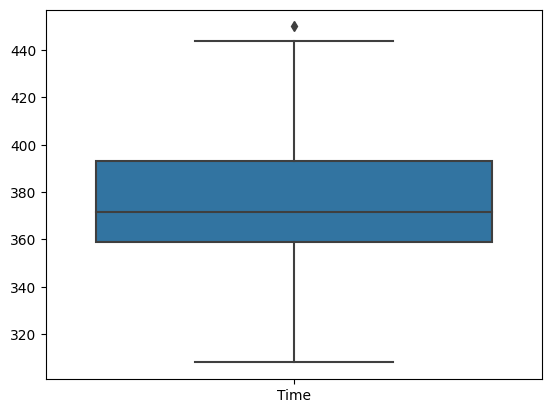

In [45]:
df1.drop(columns=['Outlier', 'Extreme_Outlier'], inplace=True)
sns.boxplot(data=df1)

* 1 outlier.
* No Extreme Outliers 
* Most datapoints are between 1st & 2nd quartile.

## Question 2

In [68]:
import numpy as np
df2 = pd.read_csv('..\homework_files\oxygen.csv')
df2.index = np.arange(1, len(df2) + 1)
df2.head()

,Weight,Treadmil
1,14.6,11.3
2,14.4,5.3
3,19.5,9.1
4,24.3,15.2
5,16.3,10.1


### Graphical Summaries

#### Univariate Plots

[Text(0.5, 0, 'Subject'),
 Text(0, 0.5, 'Oxygen'),
 Text(0.5, 1.0, 'Timeseries Plot')]

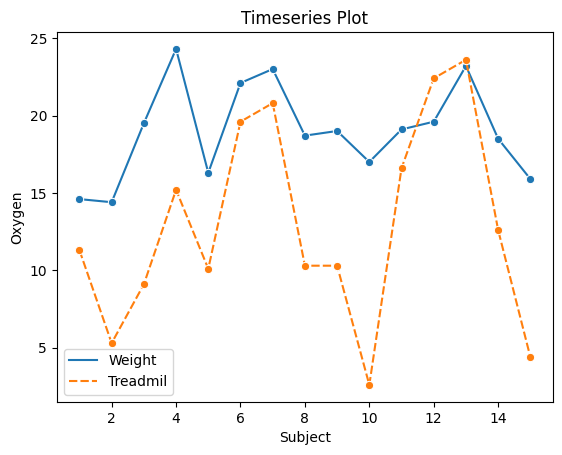

In [69]:
ax = sns.lineplot(data=df2, marker='o')
ax.set(xlabel = 'Subject', ylabel='Oxygen', title='Timeseries Plot')

Inconclusive on its own.

[Text(0.5, 0, 'Oxygen'),
 Text(0, 0.5, '#Subjects'),
 Text(0.5, 1.0, 'Histogram for Treadmil O2')]

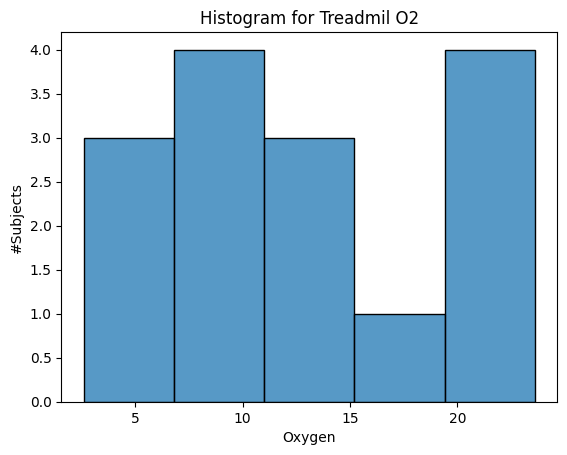

In [74]:
bx1 = sns.histplot(data=df2['Treadmil'])
bx1.set(xlabel = 'Oxygen', ylabel = '#Subjects', title = 'Histogram for Treadmil O2')

Appears to be bivariate but dataset size is too small.

[Text(0.5, 0, 'Oxygen'),
 Text(0, 0.5, '#Subjects'),
 Text(0.5, 1.0, 'Histogram for Weight O2')]

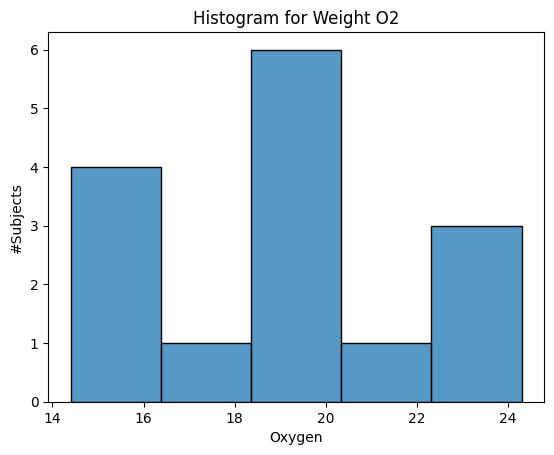

In [75]:
bx1 = sns.histplot(data=df2['Weight'])
bx1.set(xlabel = 'Oxygen', ylabel = '#Subjects', title = 'Histogram for Weight O2')

This might be univariate with strong tails on either ends or trivariate (if that is a thing).

[Text(0, 0.5, 'Oxygen'), Text(0.5, 1.0, 'Box Plots')]

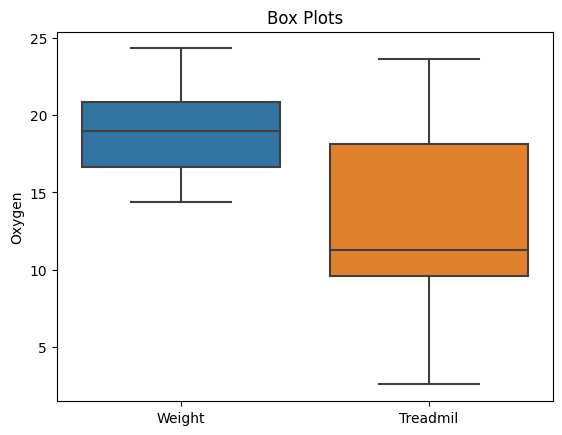

In [77]:
cx = sns.boxplot(data=df2)
cx.set(ylabel = 'Oxygen', title = 'Box Plots')

* Different means.
* Treadmil has greater IQR.
* No Outliers

#### Bivariate Plot

<AxesSubplot: xlabel='Treadmil', ylabel='Weight'>

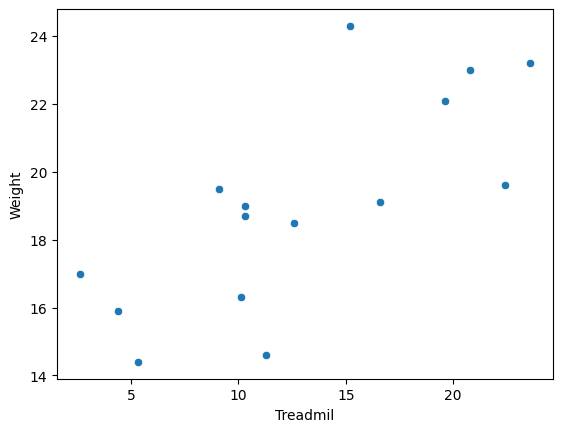

In [80]:
sns.scatterplot(data=df2, x='Treadmil', y='Weight')

Not enough datapoints to establish any kind of relationship between these two.